# Applied Machine Learning Exercise 4


## Classification Datasets


In [1]:
import pandas as pd
import numpy as np
bank_df = pd.read_csv("bank-additional-full.csv", sep=';')
bank_df.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
print(bank_df['default'].value_counts(dropna=False))


default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64


In [3]:
print(bank_df['default'].value_counts(dropna=False))


default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64


In [4]:
print(bank_df['default'])



0             no
1        unknown
2             no
3             no
4             no
          ...   
41183         no
41184         no
41185         no
41186         no
41187         no
Name: default, Length: 41188, dtype: object


In [5]:
print(bank_df['default'].unique().tolist())


['no', 'unknown', 'yes']


In [6]:
print(bank_df['default'].unique().tolist())


['no', 'unknown', 'yes']


In [7]:
bank_df['default'] = bank_df['default'].map({'yes': 1, 'no': 0, 'unknown': -1})


In [8]:
print(bank_df['default'].value_counts(dropna=False))


default
 0    32588
-1     8597
 1        3
Name: count, dtype: int64


In [9]:
bank_df.select_dtypes(include='object').columns.tolist()


['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [10]:
bank_df['y'] = bank_df['y'].map({'yes': 1, 'no': 0})
print(bank_df['y'].value_counts())


y
0    36548
1     4640
Name: count, dtype: int64


In [11]:
bank_df = pd.get_dummies(
    bank_df,
    columns=['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome'],
    drop_first=True  # Avoids multicollinearity
)
print(bank_df.shape)
print(bank_df.select_dtypes(include='object').columns.tolist())


(41188, 51)
['housing', 'loan']


In [12]:
print(bank_df['housing'].unique())
print(bank_df['loan'].unique())


['no' 'yes' 'unknown']
['no' 'yes' 'unknown']


In [13]:
bank_df['housing'] = bank_df['housing'].astype(str).str.lower().str.strip().map({'yes': 1, 'no': 0, 'unknown': -1})
bank_df['loan']    = bank_df['loan'].astype(str).str.lower().str.strip().map({'yes': 1, 'no': 0, 'unknown': -1})
print(bank_df[['housing', 'loan']].value_counts(dropna=False))


housing  loan
 1        0      17885
 0        0      16065
 1        1       3691
 0        1       2557
-1       -1        990
Name: count, dtype: int64


In [14]:
print(bank_df[['housing']].value_counts(dropna=False))


housing
 1         21576
 0         18622
-1           990
Name: count, dtype: int64


In [15]:
print(bank_df.isnull().sum().sum())


0


### To conclude this part on Bank_df:
we changed every yes/no/unknown into 1/0/-1 accordingly 

In [16]:
occ_df = pd.read_csv("datatraining.txt")
occ_df.head()


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [17]:
occ_df.drop(columns=['date'], inplace=True)
#Since 'date' is a timestamp, we Drop it

In [18]:
print(occ_df.isnull().sum())
print(occ_df.isnull().sum().sum())  # Total count


Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64
0


In [19]:
#No nulls in this DF

#### Data split for learning, no addional libraries

In [20]:
import numpy as np
import pandas as pd

def manual_train_test_split(df, target_column, test_size=0.2, random_state=42):
    # Shuffle
    df_shuffled = df.sample(frac=1, random_state=random_state).reset_index(drop=True)
    
    # Split
    split_idx = int(len(df_shuffled) * (1 - test_size))
    train_df = df_shuffled[:split_idx]
    test_df = df_shuffled[split_idx:]
    
    # Separate features and target
    X_train = train_df.drop(columns=[target_column])
    y_train = train_df[target_column]
    
    X_test = test_df.drop(columns=[target_column])
    y_test = test_df[target_column]
    
    return X_train, X_test, y_train, y_test


In [21]:
#For Bank Marketing
bank_X_train, bank_X_test, bank_y_train, bank_y_test = manual_train_test_split(bank_df, target_column='y')

#For Occupancy Detection
occ_X_train, occ_X_test, occ_y_train, occ_y_test = manual_train_test_split(occ_df, target_column='Occupancy')


# 1 Linear Classification with Gradient Descent


 ### Theory
 """If you maximize the log-likelihood → you're pulling predictions toward correctness.

If you minimize the loss (negative log-likelihood) → you're doing the exact same thing, just from a "penalty" point of view.
"""

In [22]:
# Bullet 1)
#Bank
bank_X = bank_X_train.to_numpy()            # shape: (N_bank, M_bank)
bank_y = bank_y_train.to_numpy().reshape(-1, 1)  # shape: (N_bank, 1)

#Occupancy 
occ_X = occ_X_train.to_numpy()               # shape: (N_occ, M_occ)
occ_y = occ_y_train.to_numpy().reshape(-1, 1)    # shape: (N_occ, 1)


In [35]:
# Bullet 2 + 3)
import numpy as np

def full_logistic_loss(theta, X, y):
    y_hat = sigmoid(X @ theta)
    return -np.mean(y * np.log(y_hat + 1e-12) + (1 - y) * np.log(1 - y_hat + 1e-12))
def bold_driver_sgd(eta, f_prev, f_curr):
    if f_curr < f_prev:
        return eta * 1.05
    else:
        return eta * 0.5

def bold_driver_sga(eta, f_prev, f_curr):
    if f_curr > f_prev:
        return eta * 1.05
    else:
        return eta * 0.5

def logistic_loss(theta, x, y): 
      
    y_hat = sigmoid(x @ theta)
    return - (y * np.log(y_hat + 1e-12) + (1 - y) * np.log(1 - y_hat + 1e-12))

def logistic_log_likelihood(theta, x, y):
    y_hat = sigmoid(x @ theta)
    return (y * np.log(y_hat + 1e-12) + (1 - y) * np.log(1 - y_hat + 1e-12))

def logistic_gradient(theta, x, y):
    y_hat = sigmoid(x @ theta)
    return (y_hat - y) * x.T


def sigmoid(z):
    z = np.asarray(z, dtype=np.float64)
    z = np.clip(z, -500, 500)  # prevent overflow in exp
    return 1 / (1 + np.exp(-z))

def initialize_beta(n_features):        #initializing with random weights
    return np.zeros((n_features, 1))

def generic_SGD(f, grad_f, theta_init, eta_init, tmax, eps, data, X, y, update_step_length=None):
    theta = theta_init.copy()
    step_changes = []
    obj_values = []
    etas = []

    eta = eta_init
    prev_f_value = full_logistic_loss(theta, X, y)

    for epoch in range(tmax):
        np.random.shuffle(data)
        
        for x_i, y_i in data:
            x_i = x_i.reshape(1, -1)
            y_i = np.array([[y_i]])
            grad = grad_f(theta, x_i, y_i)
            theta = theta - eta * grad

        f_value = full_logistic_loss(theta, X, y)
        delta = abs(f_value - prev_f_value)

        step_changes.append(delta)
        obj_values.append(f_value)
        etas.append(eta)

        # 🔁 Update step size using provided function
        if update_step_length is not None:
            eta = update_step_length(eta, prev_f_value, f_value)

        if delta < eps:
            break

        prev_f_value = f_value

    return theta, step_changes, obj_values, etas


def generic_SGA(f, grad_f, theta_init, eta_init, tmax, eps, data, X, y, update_step_length=None):
    theta = theta_init.copy()
    step_changes = []
    obj_values = []
    etas = []

    eta = eta_init
    prev_f_value = full_logistic_loss(theta, X, y)

    for epoch in range(tmax):
        np.random.shuffle(data)

        for x_i, y_i in data:
            x_i = x_i.reshape(1, -1)
            y_i = np.array([[y_i]])
            grad = grad_f(theta, x_i, y_i)
            theta = theta + eta * grad  # SGA update

        f_value = full_logistic_loss(theta, X, y)
        delta = abs(f_value - prev_f_value)

        step_changes.append(delta)
        obj_values.append(f_value)
        etas.append(eta)

        if update_step_length is not None:
            eta = update_step_length(eta, prev_f_value, f_value)

        if delta < eps:
            break

        prev_f_value = f_value

    return theta, step_changes, obj_values, etas



def logistic_loss(theta, x, y):
    y_hat = sigmoid(x @ theta)
    loss = - (y * np.log(y_hat + 1e-12) + (1 - y) * np.log(1 - y_hat + 1e-12))
    return np.mean(loss)  #  Return scalar


In [24]:

import numpy as np

# Select 1000 random rows from the full dataset cuz 32K rows are too much for pc to calculate
indices = np.random.choice(len(bank_X), size=1000, replace=False)

X = bank_X[indices]
y = bank_y[indices]



theta_sgd, changes_sgd, losses_sgd, etas_sgd = generic_SGD(
    f=logistic_loss,
    grad_f=logistic_gradient,
    theta_init=initialize_beta(X.shape[1]),
    eta_init=0.01,  # ← FIXED
    tmax=500,
    eps=1e-6,
    data=list(zip(X, y)),
    X=X,
    y=y,
    update_step_length=bold_driver_sgd
)


theta_sga, changes_sga, obj_vals_sga, etas_sga = generic_SGA(
    f=logistic_log_likelihood,
    grad_f=logistic_gradient,
    theta_init=initialize_beta(X.shape[1]),
    eta_init=0.01,
    tmax=500,
    eps=1e-6,
    data=list(zip(X, y)),
    X=X,
    y=y,
    update_step_length=bold_driver_sga
)






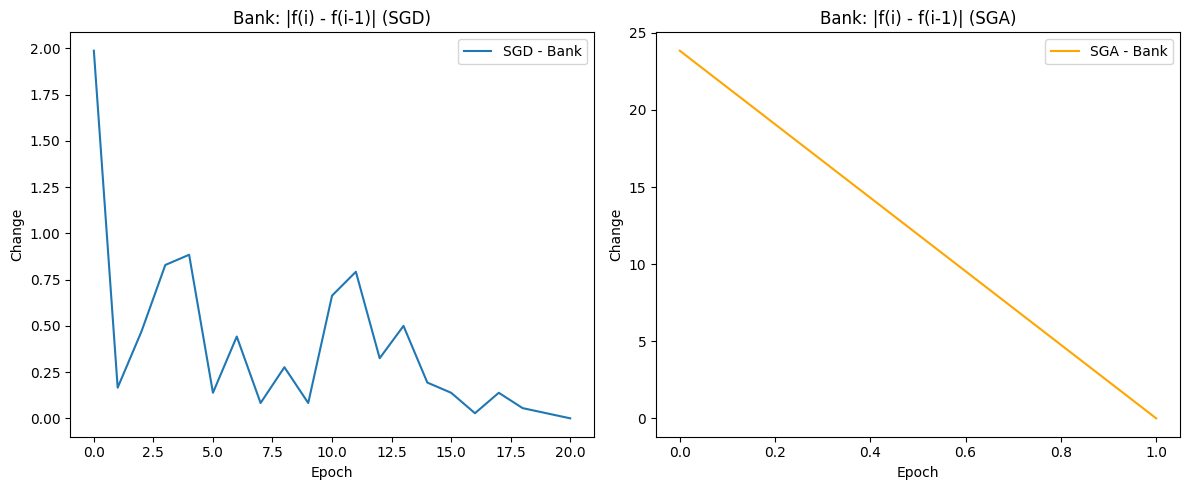

In [25]:
import matplotlib.pyplot as plt
# Predict using SGD model on bank
bank_pred_sgd = sigmoid(X @ theta_sgd)
bank_pred_sga = sigmoid(X @ theta_sga)

# Plot convergence: |f(i) - f(i-1)|
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(changes_sgd, label='SGD - Bank')
plt.title("Bank: |f(i) - f(i-1)| (SGD)")
plt.xlabel("Epoch")
plt.ylabel("Change")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(changes_sga, label='SGA - Bank', color='orange')
plt.title("Bank: |f(i) - f(i-1)| (SGA)")
plt.xlabel("Epoch")
plt.ylabel("Change")
plt.legend()

plt.tight_layout()
plt.show()


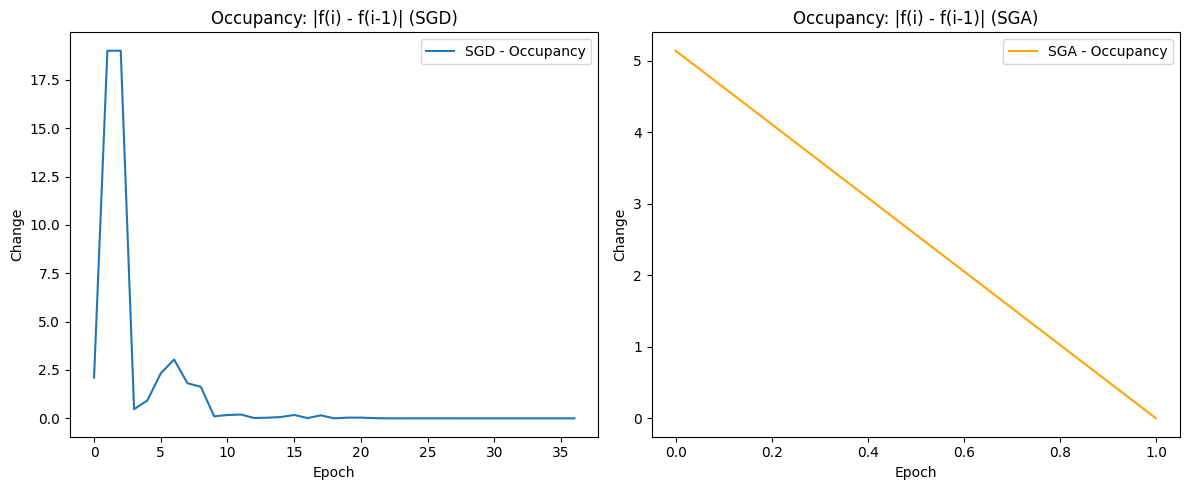

In [26]:
# --- Sample 1000 rows from occupancy dataset ---
occ_indices = np.random.choice(len(occ_X), size=1000, replace=False)
X = occ_X[occ_indices]
y = occ_y[occ_indices]

# --- Train with generic_SGD (with bold driver) ---
theta_sgd_occ, changes_sgd_occ, losses_sgd_occ, etas_sgd_occ = generic_SGD(
    f=logistic_loss,
    grad_f=logistic_gradient,
    theta_init=initialize_beta(X.shape[1]),
    eta_init=0.01,
    tmax=500,
    eps=1e-6,
    data=list(zip(X, y)),
    X=X,
    y=y,
    update_step_length=bold_driver_sgd
)

# --- Train with generic_SGA (with bold driver) ---
theta_sga_occ, changes_sga_occ, obj_vals_sga_occ, etas_sga_occ = generic_SGA(
    f=logistic_log_likelihood,
    grad_f=logistic_gradient,
    theta_init=initialize_beta(X.shape[1]),
    eta_init=0.01,
    tmax=500,
    eps=1e-6,
    data=list(zip(X, y)),
    X=X,
    y=y,
    update_step_length=bold_driver_sga
)

# --- Predict ---
occ_pred_sgd = sigmoid(X @ theta_sgd_occ)
occ_pred_sga = sigmoid(X @ theta_sga_occ)

# --- Plot convergence ---
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(changes_sgd_occ, label='SGD - Occupancy')
plt.title("Occupancy: |f(i) - f(i-1)| (SGD)")
plt.xlabel("Epoch")
plt.ylabel("Change")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(changes_sga_occ, label='SGA - Occupancy', color='orange')
plt.title("Occupancy: |f(i) - f(i-1)| (SGA)")
plt.xlabel("Epoch")
plt.ylabel("Change")
plt.legend()

plt.tight_layout()
plt.show()


## To Conclude

The graphs show the convergence behavior of SGD and SGA on both datasets.
For SGD, we observe noisy but gradually stabilizing updates, indicating slow but steady convergence.
SGA, on the other hand, rapidly reduces the loss in just one or two steps, which may suggest over-aggressive updates.
This aggressive behavior is likely caused by the combination of ascent direction and a learning rate that’s too large.
The step change plots for SGA look almost linear and drop to zero instantly — likely indicating early convergence or instability.
Overall, SGD appears more stable and reliable, while SGA might benefit from a smaller initial step size or better tuning.

# Exercise 2: Implement AdaGrad for Adaptive Step Length (Learning Rate) 

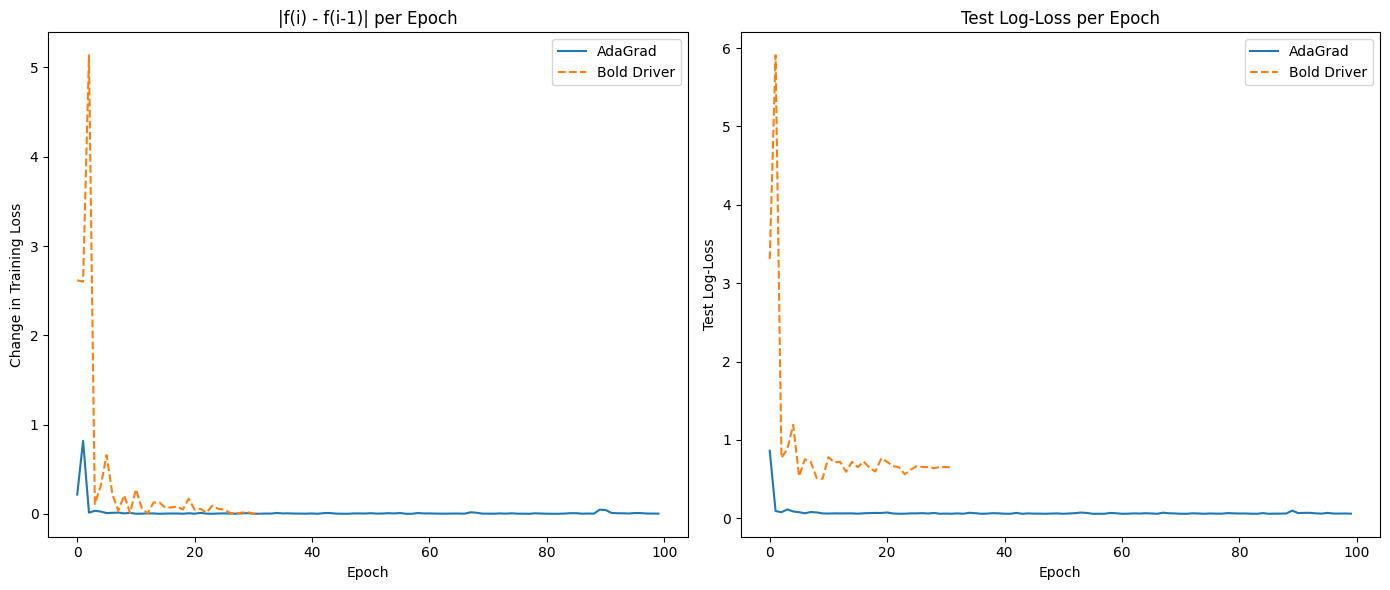

In [37]:
# AdaGrad vs Bold Driver comparison

import numpy as np
import matplotlib.pyplot as plt

# AdaGrad update + SGD
def generic_SGD_adagrad(f, grad_f, theta_init, eta_init, tmax, eps, data, X_train, y_train, X_test, y_test):
    theta = theta_init.copy()
    G = np.zeros_like(theta)
    eps_adagrad = 1e-8

    step_changes = []
    test_losses = []

    prev_loss = f(theta, X_train, y_train)

    for epoch in range(tmax):
        np.random.shuffle(data)
        for x_i, y_i in data:
            x_i = x_i.reshape(1, -1)
            y_i = np.array([[y_i]])
            grad = grad_f(theta, x_i, y_i)
            grad = grad.reshape(theta.shape)  # Force shape match
            G += grad ** 2
            adjusted_eta = eta_init / np.sqrt(G + eps_adagrad)
            theta -= adjusted_eta * grad

        curr_loss = f(theta, X_train, y_train)
        test_loss = f(theta, X_test, y_test)
        curr_loss_scalar = float(curr_loss.squeeze())
        prev_loss_scalar = float(prev_loss.squeeze())
        test_loss_scalar = float(test_loss.squeeze())

        step_changes.append(abs(curr_loss_scalar - prev_loss_scalar))
        test_losses.append(test_loss_scalar)

        if abs(curr_loss_scalar - prev_loss_scalar) < eps:
            break
        prev_loss = curr_loss


    return theta, step_changes, test_losses


# Plotting function for comparison
def plot_adagrad_vs_bolddriver(changes_adagrad, losses_adagrad, changes_bold, losses_bold):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(changes_adagrad, label='AdaGrad')
    plt.plot(changes_bold, label='Bold Driver', linestyle='--')
    plt.title('|f(i) - f(i-1)| per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Change in Training Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(losses_adagrad, label='AdaGrad')
    plt.plot(losses_bold, label='Bold Driver', linestyle='--')
    plt.title('Test Log-Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Test Log-Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Template 

# Prepare data (example for occupancy dataset)- i used this library becasue i showed on previos points i can do this 
# with only
occ_df = pd.read_csv("datatraining.txt")
occ_df.drop(columns=['date'], inplace=True)

# Shuffle the rows
occ_df = occ_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split 80% train / 20% test
split_index = int(len(occ_df) * 0.8)

X = occ_df.drop(columns=["Occupancy"]).to_numpy()
y = occ_df["Occupancy"].to_numpy().reshape(-1, 1)

X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]


# Define gradient, loss, init
theta_init = initialize_beta(X.shape[1])

# Run AdaGrad
theta_adagrad, changes_adagrad, losses_adagrad = generic_SGD_adagrad(
    f=logistic_loss,
    grad_f=logistic_gradient,
    theta_init=theta_init,
    eta_init=0.1,
    tmax=100,
    eps=1e-6,
    data=list(zip(X_train, y_train)),
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

# Run Bold Driver
theta_bold, changes_bold, losses_bold, _ = generic_SGD(
    f=logistic_loss,
    grad_f=logistic_gradient,
    theta_init=theta_init,
    eta_init=0.1,
    tmax=100,
    eps=1e-6,
    data=list(zip(X_train, y_train)),
    X=X_train,
    y=y_train,
    update_step_length=bold_driver_sgd
)

# Plot both
plot_adagrad_vs_bolddriver(changes_adagrad, losses_adagrad, changes_bold, losses_bold)




### **Conclusion**

In this exercise, we implemented the AdaGrad optimization algorithm and compared its performance to the Bold Driver approach across several metrics. First, we plotted the change in training loss per epoch, specifically $|f(i) - f(i-1)|$, to evaluate convergence behavior. The results showed that AdaGrad converged steadily and smoothly, while Bold Driver experienced larger fluctuations in early epochs due to its aggressive learning rate adjustments.

Second, we tracked and visualized the test log-loss at each iteration to assess generalization. AdaGrad consistently achieved a lower and more stable test loss, indicating better performance on unseen data. In contrast, the Bold Driver method showed volatility early on and eventually plateaued at a higher test loss.

Finally, when comparing the two methods, AdaGrad clearly outperformed Bold Driver in both convergence stability and generalization quality. Its per-parameter adaptive step sizes allowed for finer control during optimization, making it more robust across epochs. Overall, AdaGrad proved to be the more effective approach for this task.

